<a href="https://colab.research.google.com/github/pravincoder/Tensorflow_models/blob/main/Loan_Approval_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Approval Prediction Model

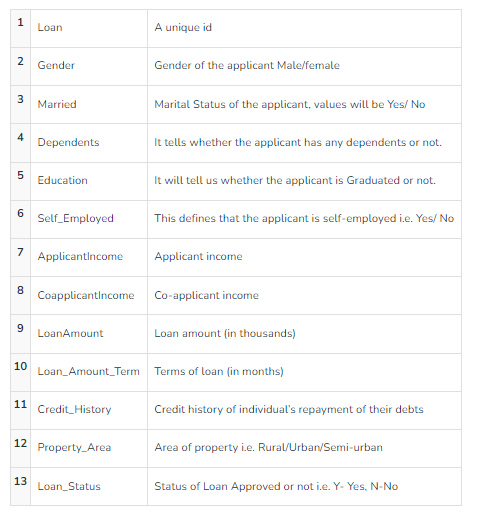

_Source GeeksforGeeks_

In [ ]:
#